
# <center>WORD2VEC</center>


## <font color = blue> I. DATA PREPARATION</font>

> A. LIBRARIES<br>
> B. COLLECTING DATA AND CREATING DICTIONARIES<br>
> C. DATA CLEANING AND DROP NaN<br>


## <font color = blue> II.MODEL WORD2VEC</font>

> A. CREATION OF MODEL WORD2VEC<br>
> B. VOCABULARY CONSTRUCTION<br> 
> C. CREATION OF A NEW DATAFRAME WITH PREVIOUS VOCABULARY<br>
> D. VECTORIZATION AND DROP NaN<br>
> E. SPLIT BETWEEN TRAINING SET AND TEST SET<br>


## <font color = blue> III. MODEL DENSE</font> 

> A. CREATION OF MODEL<br>
> B. COMPILING AND TRAINING<br>
> C. TRAINING HISTORY<br>
> D. CONFUSION MATRIX<br>
> E. CLASSIFICATION REPORT<br>


## <font color = blue> I. DATA PREPARATION</font>

> A. LIBRARIES<br>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import  RegexpTokenizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout,Activation
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.metrics import classification_report

> B. COLLECTING DATA</br> 

In [63]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,filename,url,description,type,filepath,scraped,old_filename,old_filepath,...,text_ocr,words_count,text_en,text_fr,text_fr_norm,text_en_norm,target_en,target_fr,target,target_min
0,0,0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,...,FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...,98,Invoice Logo Joanna Binet Coubertin Paris Invo...,Facture Logo Joanna Binet Coubertin Paris F...,facture logo joanna binet coubertin paris fact...,invoice logo joanna binet coubertin paris invo...,invoice,facture,invoice,invoice
1,1,1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,...,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,97,Joanna Binet Coubertin Paris Invoice Invoice i...,Joanna Binet Coubertin Paris Facture Factur...,joanna binet coubertin paris facture facturé c...,joanna binet coubertin paris invoice invoice c...,invoice,facture,invoice,invoice
2,2,2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,...,FACTURE Mon entreprise : Nom de la société Ad...,45,Invoice My company : Company name Mail address...,Facture Mon entreprise : Nom de la société Ad...,facture entreprise société adresse postale adr...,invoice company company name mail address tele...,invoice,facture,invoice,invoice
3,3,3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,...,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,99,Joanna Binet Coubertin Paris Bill To Cinderell...,Joanna Binet Coubertin Paris Facture À Cend...,joanna binet coubertin paris facture cendrillo...,joanna binet coubertin paris bill cinderella a...,invoice,facture,invoice,invoice
4,4,4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,...,Payer en ligne > FACTURE No SFIDELI F/05.2020...,157,Pay online Invoice No Sfideli F/ Creation date...,Payer en ligne Facture No Sfideli F/ Date de...,payer ligne facture sfideli date création date...,online invoice sfideli creation date validity ...,invoice,facture,invoice,invoice


In order to improve the performance, we will group some classes

In [64]:
# Replace current classes by new classes i.e by grouping certain classes together

new_classes =  { 'advertisement': 'other_types',
                'form'        : 'other_types',
               'handwritten' : 'other_types',
               'letter' : 'other_types',
                'memo': 'other_types',
                'presentation': 'other_types',
               'invoice' :'facture',
               'news_article': 'scientific_doc',
               'scientific_publication': 'scientific_doc',
               'scientific_report': 'scientific_doc'}

df = df.replace(new_classes)

In [65]:
# Creating dictionary
dico_type = {'facture': 0,
             'id_pieces': 1,
             'justif_domicile': 2,
             'passeport': 3,
             'paye': 4,
             'carte postale': 5,
             'other_types': 6,
             'scientific_doc': 7,
             'resume': 8,
             'specification': 9,
             'budget': 10,
             'file_folder': 11,
             'email': 12,
             'questionnaire': 13}

# Creating revert dictionary
dico_type_inv = {v: k for k, v in dico_type.items()}

# Convert types according to the dictionary
df['type_num'] = df.type.replace(dico_type)

> C. DATA CLEANING AND DROP NaN</br>

In [66]:
#DATA CLEANING
stop_words = set(stopwords.words('english'))
stop_words.update(["." , ",",':'])
stop_words=list(stop_words)
stop_words.extend(stopwords.words('french'))
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(str(w).lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()


df['text_image'] = df.text_ocr.apply(lambda x :preprocess_sentence(x))
df = df.dropna(subset = ['text_image']) # DROP NaN
df['text_image'].head(20)

0     facture logo joanna binet coubertin paris fact...
1     joanna binet coubertin paris facture facture c...
2     facture entreprise nom societe adresse postale...
3     joanna binet coubertin paris facture cendrillo...
4     payer ligne facture sfideli date creation date...
5     joanna binet coubertin paris facture cendrillo...
6     nom entreprise facture adresse ville province ...
7     ivotre societe choisir dato facture facturer c...
8     identification vendeur nom independant adresse...
9     facture joanna binet coubertin paris facture c...
10    facture date facauraton puiputt etheance renov...
11    facture nom societe adresse ville siret tel no...
12    invoice brand name invoice dwyane clark dummy ...
13    nom compagnie details contact logo adresse pos...
14    nom entreprise siogan entreprise adresse ville...
15    logo date numero facture nom entreprise adress...
16    facture nom entreprise nom entreprise com rue ...
17    contrat electricite tarif bleu kva option 

In [67]:
stop_words = set(stopwords.words('french'))
stop_words.update(["." , ",",':'])
tokenizer=RegexpTokenizer(("[a-zA-Zé]{3,}"))
def stop_words_filtering(liste):
    liste_new=[]
    for i in liste:
        if i not in stop_words:
            liste_new.append(i)
        else:
            continue 
    return liste_new
sentences=[]
for txt in df.text_image:
    mots=stop_words_filtering(tokenizer.tokenize(str(txt).lower()))
    sentences.append(mots)



## <font color = blue> II.MODEL WORD2VEC</font>

> A. CREATION OF MODEL WORD2VEC<br>




In [116]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(min_count=20,    # Ignores all words with total frequency lower than this
                     window=1,        # Maximum distance between the current and predicted word within a sentenc
                     vector_size=500, # Dimensionality of the word vectors
                     alpha=0.001,      # The initial learning rate
                     negative=10,     # negative sampling will be used
                     seed=1           # Seed for the random number generator
                          )

> B. VOCABULARY CONSTRUCTION<br>

In [117]:
w2v_model.build_vocab(sentences, progress_per=100000)
words = list(w2v_model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))
print(words)

Vocabulary size: 709
['date', 'total', 'tobacco', 'net', 'nom', 'montant', 'salaire', 'research', 'cotisations', 'taux', 'valeur', 'base', 'revenu', 'sociale', 'non', 'paie', 'new', 'facture', 'smoking', 'securite', 'heures', 'bulletin', 'csg', 'university', 'employeur', 'impot', 'paris', 'code', 'cigarette', 'brut', 'may', 'payer', 'carte', 'imposable', 'cigarettes', 'one', 'rue', 'smoke', 'chomage', 'name', 'adresse', 'paiement', 'tva', 'complementaire', 'assurance', 'contributions', 'page', 'sante', 'francaise', 'service', 'retraite', 'health', 'york', 'part', 'inc', 'cancer', 'maladie', 'travail', 'republique', 'number', 'morris', 'client', 'american', 'information', 'periode', 'conges', 'brand', 'deductible', 'two', 'medicine', 'telephone', 'national', 'tranche', 'report', 'year', 'use', 'philip', 'study', 'autres', 'institute', 'state', 'numero', 'also', 'general', 'deces', 'description', 'would', 'per', 'data', 'time', 'euros', 'mois', 'france', 'company', 'janvier', 'martin', '

>C. CREATION OF A NEW DATAFRAME WITH PREVIOUS VOCABULARY<br>

Here, we create a new dataframe which is made up of words belonging to the vocabulary list. 

In [118]:
list_of_vocablr=[]
df_vocab=pd.DataFrame(columns=['text'])

for indx,line_d in enumerate(df.text_image):
    mots=stop_words_filtering(tokenizer.tokenize(str(line_d).lower()))
    for tok in mots:
        if tok not in words:
             
            continue  
       
        else:
            list_of_vocablr.append(tok)
    df_vocab.loc[indx]=' '.join(list_of_vocablr)
            
    list_of_vocablr=[]
    


>D. VECTORIZATION AND DROP NaN<br>


In [119]:

data_all_num=[]
num_line=np.zeros([500])
for txt in df_vocab.text:
    for mots in txt.split():
        num_line=num_line+w2v_model.wv[mots]
    data_all_num.append(num_line/len(txt.split()))
    num_line=np.zeros([500])
    
    
data_all_num=pd.DataFrame(np.array(data_all_num))
data_all_num['type']=df.type  
data_all_num.dropna(inplace=True) # DROP NaN
data_all_num.head()

C:\Users\sadoun\AppData\Local\Temp\ipykernel_3804\4257475246.py:6: RuntimeWarning: invalid value encountered in true_divide
  data_all_num.append(num_line/len(txt.split()))


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,type
0,0.000616,0.000228,0.000648,0.000329,-0.000046,0.000018,-0.000493,0.000558,-0.000056,-0.000240,...,-0.000146,0.000259,0.000144,0.000024,-0.000178,0.000048,-0.000169,0.000207,-0.000175,facture
1,0.000565,0.000167,0.000655,0.000299,-0.000062,0.000023,-0.000563,0.000538,-0.000109,-0.000316,...,-0.000097,0.000286,0.000161,0.000015,-0.000156,0.000112,-0.000259,0.000189,-0.000247,facture
2,0.000221,0.000517,0.000188,-0.000243,-0.000031,0.000024,0.000234,0.000721,-0.000265,-0.000057,...,0.000189,-0.000015,-0.000086,0.000255,-0.000440,0.000037,-0.000111,0.000131,-0.000411,facture
3,0.000565,0.000167,0.000655,0.000299,-0.000062,0.000023,-0.000563,0.000538,-0.000109,-0.000316,...,-0.000097,0.000286,0.000161,0.000015,-0.000156,0.000112,-0.000259,0.000189,-0.000247,facture
4,0.000265,0.000687,-0.000208,0.000166,-0.000258,-0.000006,0.000171,0.000656,0.000125,-0.000544,...,-0.000081,0.000358,0.000134,0.000325,-0.000292,0.000205,0.000037,-0.000181,0.000035,facture


>E. SPLIT BETWEEN TRAINING SET AND TEST SET<br>

In [120]:
data=data_all_num.drop('type',axis=1)
target=data_all_num.type.replace(list(data_all_num.type.unique()),[i for i in range(len(data_all_num.type.unique()))])

X_train,X_test, y_train, y_test=train_test_split(data,target,test_size=0.2,random_state=1234)

## <font color = blue> III. MODEL DENSE</font> 

> A. CREATION OF MODEL<br>

In [145]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout,Activation
model=Sequential()
model.add(Dense(units = 256,input_shape=(500,)))
model.add((Activation('relu')))
model.add(Dropout(0.3))
model.add(Dense(units = 14, activation = "softmax"))
model.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               128256    
                                                                 
 activation_14 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 14)                3598      
                                                                 
Total params: 131,854
Trainable params: 131,854
Non-trainable params: 0
_________________________________________________________________


> B. COMPILING AND TRAINING<br>

In [146]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam", 
              metrics = ["accuracy"])

history=model.fit(X_train,y_train,
             epochs = 800,
             batch_size = 32,
                  
             validation_split = 0.2)

Epoch 1/800
21/21 [==============================] - 1s 12ms/step - loss: 2.6205 - accuracy: 0.1577 - val_loss: 2.5924 - val_accuracy: 0.2024
Epoch 2/800
21/21 [==============================] - 0s 4ms/step - loss: 2.5625 - accuracy: 0.1696 - val_loss: 2.5070 - val_accuracy: 0.2024
Epoch 3/800
21/21 [==============================] - 0s 3ms/step - loss: 2.4710 - accuracy: 0.1875 - val_loss: 2.4032 - val_accuracy: 0.2024
Epoch 4/800
21/21 [==============================] - 0s 4ms/step - loss: 2.3916 - accuracy: 0.1815 - val_loss: 2.3288 - val_accuracy: 0.2024
Epoch 5/800
21/21 [==============================] - 0s 4ms/step - loss: 2.3536 - accuracy: 0.1726 - val_loss: 2.2986 - val_accuracy: 0.2024
Epoch 6/800
21/21 [==============================] - 0s 4ms/step - loss: 2.3373 - accuracy: 0.1830 - val_loss: 2.2894 - val_accuracy: 0.2024
Epoch 7/800
21/21 [==============================] - 0s 4ms/step - loss: 2.3328 - accuracy: 0.1786 - val_loss: 2.2840 - val_accuracy: 0.2024
Epoch 8/800


Epoch 59/800
21/21 [==============================] - 0s 3ms/step - loss: 1.8340 - accuracy: 0.5074 - val_loss: 1.8515 - val_accuracy: 0.5000
Epoch 60/800
21/21 [==============================] - 0s 3ms/step - loss: 1.8315 - accuracy: 0.5238 - val_loss: 1.8437 - val_accuracy: 0.5119
Epoch 61/800
21/21 [==============================] - 0s 3ms/step - loss: 1.8177 - accuracy: 0.5134 - val_loss: 1.8328 - val_accuracy: 0.4881
Epoch 62/800
21/21 [==============================] - 0s 3ms/step - loss: 1.7987 - accuracy: 0.5283 - val_loss: 1.8229 - val_accuracy: 0.5238
Epoch 63/800
21/21 [==============================] - 0s 3ms/step - loss: 1.7796 - accuracy: 0.5298 - val_loss: 1.8158 - val_accuracy: 0.5179
Epoch 64/800
21/21 [==============================] - 0s 3ms/step - loss: 1.7835 - accuracy: 0.5298 - val_loss: 1.8053 - val_accuracy: 0.5298
Epoch 65/800
21/21 [==============================] - 0s 3ms/step - loss: 1.7644 - accuracy: 0.5298 - val_loss: 1.7969 - val_accuracy: 0.5179
Epoch 

21/21 [==============================] - 0s 4ms/step - loss: 1.3286 - accuracy: 0.6369 - val_loss: 1.4521 - val_accuracy: 0.6190
Epoch 117/800
21/21 [==============================] - 0s 4ms/step - loss: 1.3151 - accuracy: 0.6414 - val_loss: 1.4466 - val_accuracy: 0.6190
Epoch 118/800
21/21 [==============================] - 0s 3ms/step - loss: 1.3064 - accuracy: 0.6384 - val_loss: 1.4417 - val_accuracy: 0.6250
Epoch 119/800
21/21 [==============================] - 0s 4ms/step - loss: 1.2989 - accuracy: 0.6533 - val_loss: 1.4373 - val_accuracy: 0.6190
Epoch 120/800
21/21 [==============================] - 0s 3ms/step - loss: 1.3011 - accuracy: 0.6458 - val_loss: 1.4328 - val_accuracy: 0.6250
Epoch 121/800
21/21 [==============================] - 0s 3ms/step - loss: 1.2841 - accuracy: 0.6562 - val_loss: 1.4266 - val_accuracy: 0.6250
Epoch 122/800
21/21 [==============================] - 0s 3ms/step - loss: 1.2860 - accuracy: 0.6488 - val_loss: 1.4246 - val_accuracy: 0.6190
Epoch 123/800

21/21 [==============================] - 0s 3ms/step - loss: 1.0214 - accuracy: 0.6756 - val_loss: 1.2739 - val_accuracy: 0.6190
Epoch 174/800
21/21 [==============================] - 0s 3ms/step - loss: 1.0316 - accuracy: 0.6845 - val_loss: 1.2706 - val_accuracy: 0.6250
Epoch 175/800
21/21 [==============================] - 0s 3ms/step - loss: 1.0121 - accuracy: 0.6830 - val_loss: 1.2703 - val_accuracy: 0.6190
Epoch 176/800
21/21 [==============================] - 0s 3ms/step - loss: 1.0133 - accuracy: 0.6920 - val_loss: 1.2720 - val_accuracy: 0.6190
Epoch 177/800
21/21 [==============================] - 0s 3ms/step - loss: 1.0177 - accuracy: 0.6801 - val_loss: 1.2671 - val_accuracy: 0.6190
Epoch 178/800
21/21 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.6830 - val_loss: 1.2647 - val_accuracy: 0.6190
Epoch 179/800
21/21 [==============================] - 0s 3ms/step - loss: 0.9981 - accuracy: 0.6845 - val_loss: 1.2645 - val_accuracy: 0.6250
Epoch 180/800

21/21 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.7068 - val_loss: 1.2175 - val_accuracy: 0.6131
Epoch 231/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.7217 - val_loss: 1.2179 - val_accuracy: 0.6190
Epoch 232/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8355 - accuracy: 0.7202 - val_loss: 1.2167 - val_accuracy: 0.6131
Epoch 233/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8340 - accuracy: 0.7083 - val_loss: 1.2157 - val_accuracy: 0.6131
Epoch 234/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.7113 - val_loss: 1.2122 - val_accuracy: 0.6190
Epoch 235/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.7128 - val_loss: 1.2135 - val_accuracy: 0.6190
Epoch 236/800
21/21 [==============================] - 0s 3ms/step - loss: 0.8200 - accuracy: 0.7262 - val_loss: 1.2131 - val_accuracy: 0.6131
Epoch 237/800

21/21 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.7693 - val_loss: 1.1911 - val_accuracy: 0.6310
Epoch 288/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.7738 - val_loss: 1.1879 - val_accuracy: 0.6310
Epoch 289/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.7872 - val_loss: 1.1884 - val_accuracy: 0.6310
Epoch 290/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.7857 - val_loss: 1.1929 - val_accuracy: 0.6310
Epoch 291/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.7723 - val_loss: 1.1924 - val_accuracy: 0.6369
Epoch 292/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.7857 - val_loss: 1.1974 - val_accuracy: 0.6310
Epoch 293/800
21/21 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.7723 - val_loss: 1.1862 - val_accuracy: 0.6310
Epoch 294/800

21/21 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.8170 - val_loss: 1.1809 - val_accuracy: 0.6607
Epoch 345/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.8274 - val_loss: 1.1795 - val_accuracy: 0.6548
Epoch 346/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.8170 - val_loss: 1.1794 - val_accuracy: 0.6607
Epoch 347/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.8185 - val_loss: 1.1831 - val_accuracy: 0.6607
Epoch 348/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.8244 - val_loss: 1.1771 - val_accuracy: 0.6548
Epoch 349/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.8214 - val_loss: 1.1778 - val_accuracy: 0.6667
Epoch 350/800
21/21 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.8170 - val_loss: 1.1770 - val_accuracy: 0.6607
Epoch 351/800

21/21 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.8631 - val_loss: 1.1832 - val_accuracy: 0.6786
Epoch 402/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.8631 - val_loss: 1.1816 - val_accuracy: 0.6667
Epoch 403/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8452 - val_loss: 1.1815 - val_accuracy: 0.6786
Epoch 404/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.8661 - val_loss: 1.1825 - val_accuracy: 0.7083
Epoch 405/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8571 - val_loss: 1.1781 - val_accuracy: 0.6786
Epoch 406/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8601 - val_loss: 1.1770 - val_accuracy: 0.6845
Epoch 407/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8676 - val_loss: 1.1786 - val_accuracy: 0.6786
Epoch 408/800

21/21 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8735 - val_loss: 1.1868 - val_accuracy: 0.6905
Epoch 459/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8839 - val_loss: 1.1893 - val_accuracy: 0.7024
Epoch 460/800
21/21 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8839 - val_loss: 1.1831 - val_accuracy: 0.6905
Epoch 461/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8899 - val_loss: 1.1853 - val_accuracy: 0.6845
Epoch 462/800
21/21 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8750 - val_loss: 1.1778 - val_accuracy: 0.6905
Epoch 463/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8884 - val_loss: 1.1811 - val_accuracy: 0.6905
Epoch 464/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8824 - val_loss: 1.1862 - val_accuracy: 0.6905
Epoch 465/800

21/21 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.9077 - val_loss: 1.1992 - val_accuracy: 0.6905
Epoch 516/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.9122 - val_loss: 1.2051 - val_accuracy: 0.7143
Epoch 517/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.9018 - val_loss: 1.2041 - val_accuracy: 0.7024
Epoch 518/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.9137 - val_loss: 1.2034 - val_accuracy: 0.7143
Epoch 519/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.9107 - val_loss: 1.2040 - val_accuracy: 0.6905
Epoch 520/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8988 - val_loss: 1.2000 - val_accuracy: 0.7024
Epoch 521/800
21/21 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9092 - val_loss: 1.2033 - val_accuracy: 0.6905
Epoch 522/800

21/21 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.9256 - val_loss: 1.2201 - val_accuracy: 0.7143
Epoch 573/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.9167 - val_loss: 1.2255 - val_accuracy: 0.7143
Epoch 574/800
21/21 [==============================] - 0s 5ms/step - loss: 0.2856 - accuracy: 0.9092 - val_loss: 1.2232 - val_accuracy: 0.7143
Epoch 575/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.9167 - val_loss: 1.2259 - val_accuracy: 0.7202
Epoch 576/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.9211 - val_loss: 1.2279 - val_accuracy: 0.7143
Epoch 577/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.9182 - val_loss: 1.2228 - val_accuracy: 0.7262
Epoch 578/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9241 - val_loss: 1.2256 - val_accuracy: 0.7202
Epoch 579/800

21/21 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9286 - val_loss: 1.2533 - val_accuracy: 0.7143
Epoch 630/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9375 - val_loss: 1.2507 - val_accuracy: 0.7202
Epoch 631/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.9360 - val_loss: 1.2565 - val_accuracy: 0.7202
Epoch 632/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.9301 - val_loss: 1.2565 - val_accuracy: 0.7143
Epoch 633/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9375 - val_loss: 1.2588 - val_accuracy: 0.7202
Epoch 634/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9271 - val_loss: 1.2526 - val_accuracy: 0.7202
Epoch 635/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9375 - val_loss: 1.2550 - val_accuracy: 0.7143
Epoch 636/800

21/21 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9345 - val_loss: 1.2880 - val_accuracy: 0.7143
Epoch 687/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9345 - val_loss: 1.2890 - val_accuracy: 0.7143
Epoch 688/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9479 - val_loss: 1.2934 - val_accuracy: 0.7083
Epoch 689/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9390 - val_loss: 1.2929 - val_accuracy: 0.7143
Epoch 690/800
21/21 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9435 - val_loss: 1.2859 - val_accuracy: 0.7143
Epoch 691/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9345 - val_loss: 1.2917 - val_accuracy: 0.7083
Epoch 692/800
21/21 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.9375 - val_loss: 1.2920 - val_accuracy: 0.7083
Epoch 693/800

21/21 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9405 - val_loss: 1.3292 - val_accuracy: 0.6964
Epoch 744/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9390 - val_loss: 1.3255 - val_accuracy: 0.6964
Epoch 745/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.9524 - val_loss: 1.3234 - val_accuracy: 0.6964
Epoch 746/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9449 - val_loss: 1.3349 - val_accuracy: 0.7024
Epoch 747/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9479 - val_loss: 1.3310 - val_accuracy: 0.7083
Epoch 748/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9435 - val_loss: 1.3293 - val_accuracy: 0.7143
Epoch 749/800
21/21 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9479 - val_loss: 1.3306 - val_accuracy: 0.7143
Epoch 750/800

21/21 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9554 - val_loss: 1.3733 - val_accuracy: 0.7024


> C. TRAINING HISTORY<br>

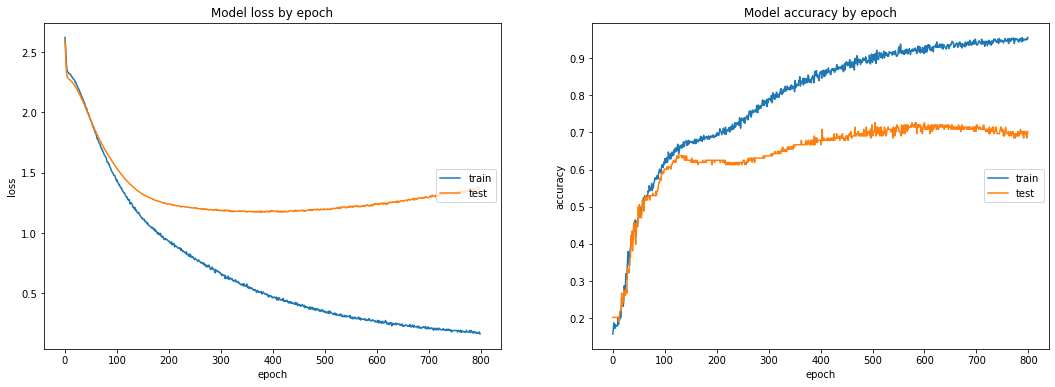

In [147]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

> D. CONFUSION MATRIX<br>

In [148]:
####### PREDICTIONS #######

y_prob = model.predict(X_test)

# Class predictions
y_pred = y_prob.argmax(axis=1)

7/7 [==============================] - 0s 2ms/step


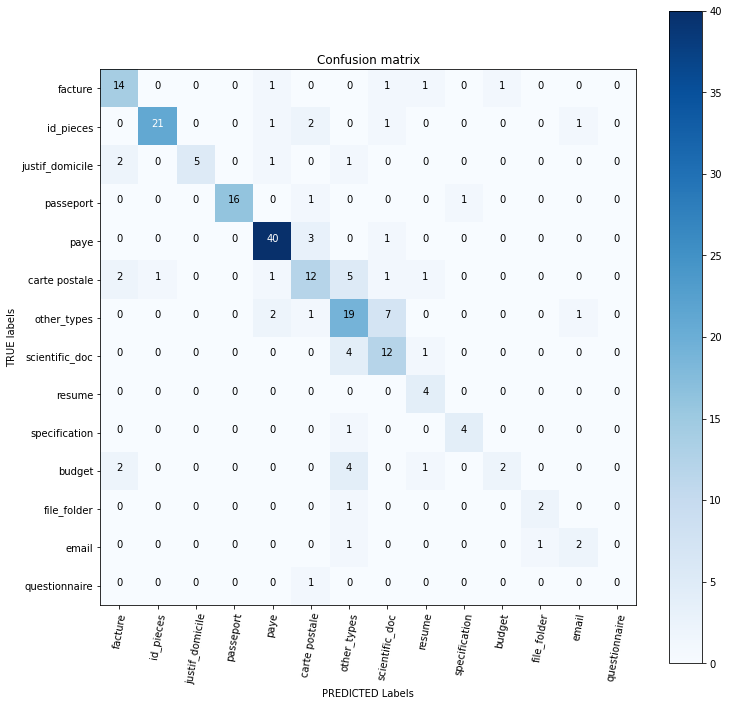

In [149]:
cnf_matrix = confusion_matrix(y_test, y_pred)

classes = dico_type
plt.figure(figsize = (12, 12))

plt.imshow(cnf_matrix, interpolation = 'nearest', cmap = 'Blues')
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 80)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('TRUE labels')
plt.xlabel('PREDICTED Labels')
plt.show()

> E. CLASSIFICATION REPORT<br>

In [150]:
target = df['type'].unique().tolist()
target_test = [target[i] for i in y_test]
target_pred = [target[i] for i in y_pred]

print( classification_report(target_test, target_pred) )

                 precision    recall  f1-score   support

         budget       0.67      0.22      0.33         9
  carte postale       0.60      0.52      0.56        23
          email       0.50      0.50      0.50         4
        facture       0.70      0.78      0.74        18
    file_folder       0.67      0.67      0.67         3
      id_pieces       0.95      0.81      0.88        26
justif_domicile       1.00      0.56      0.71         9
    other_types       0.53      0.63      0.58        30
      passeport       1.00      0.89      0.94        18
           paye       0.87      0.91      0.89        44
  questionnaire       0.00      0.00      0.00         1
         resume       0.50      1.00      0.67         4
 scientific_doc       0.52      0.71      0.60        17
  specification       0.80      0.80      0.80         5

       accuracy                           0.73       211
      macro avg       0.66      0.64      0.63       211
   weighted avg       0.74   

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
